In [41]:
using Interact, Plots, DifferentialEquations, FFTW

# Flujo en el circulo

## Ecuacion de Adler. 

Veamos primero la ecuacion de Adler en la variable angular $\theta$.

$\dot{\theta} = \omega-a\sin(\theta)$

que presenta una bifurcacion nodo-silla cuando $\omega=a$

Si $a=0$ esta ecuacion representa un fasor con una frecuencia angular fija $\omega$

In [9]:
#definimos la ecuacion
adler(u,p,t) = p[1]-p[2]*sin(u)

adler1 (generic function with 1 method)

In [85]:
(ω,a) = [1.0,0.0]
prob = ODEProblem(adler, 0.5, (0,50.0), [ω,a])

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 50.0)
u0: 0.5

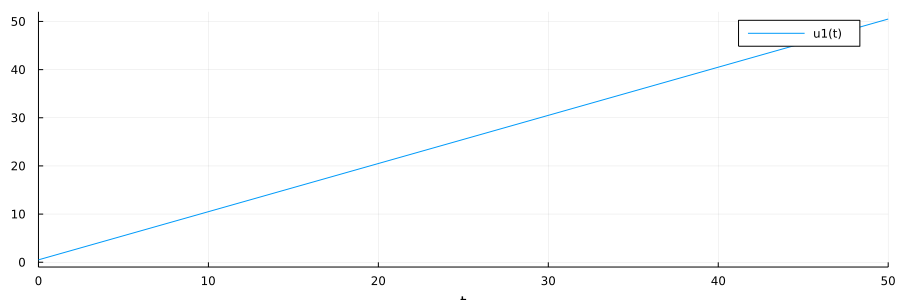

In [86]:
sol = solve(prob)
plot(sol,size = (900,300))

La solucion crece porque esto no es mas que la fase $\theta$ creciendo con velocidad $\omega$.
Como la fase es un angulo deberiamos restringirla al dominio $(0,\pi)$ lo cual podemos hacer con al funcion modulo (mod) y definiendo una funcion "anonima" que hace la tranformacion dentro de plot

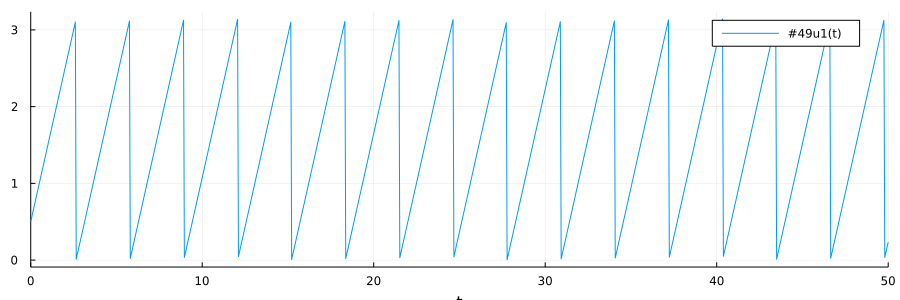

In [84]:
plot(sol,vars=((t,x)->(t,mod(x,pi)),0,1),size = (900,300))

Si pensamos esto como una oscilacion podemos representar la proyeccion en una coordenada usando la funcion seno (sin) en lugar del modulo.

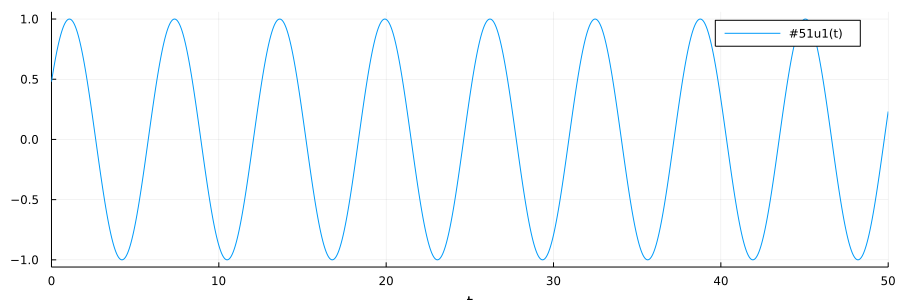

In [87]:
plot(sol,vars=((t,x)->(t,sin(x)),0,1),size = (900,300))

Hasta ahora nada muy apasionante, veamos que pasa si incrementamos $a$ a medida que se aproxima a $\omega$

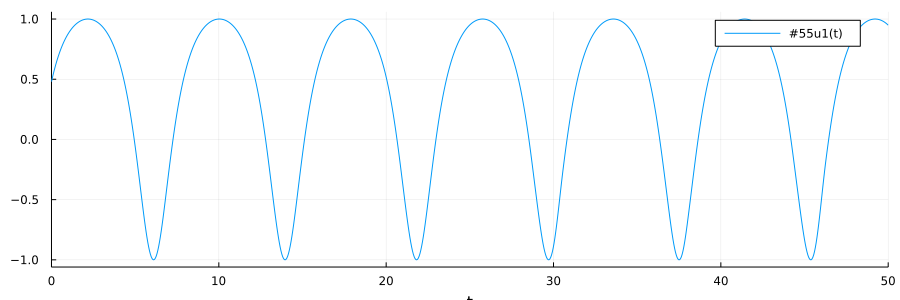

In [89]:
(ω,a) = [1.0,0.6]
sol=solve(ODEProblem(adler, 0.5, (0,50.0), [ω,a]))
plot(sol,vars=((t,x)->(t,sin(x)),0,1),size = (900,300))

Y si se incrementa $a$ hasta un valor cercano a $\omega$

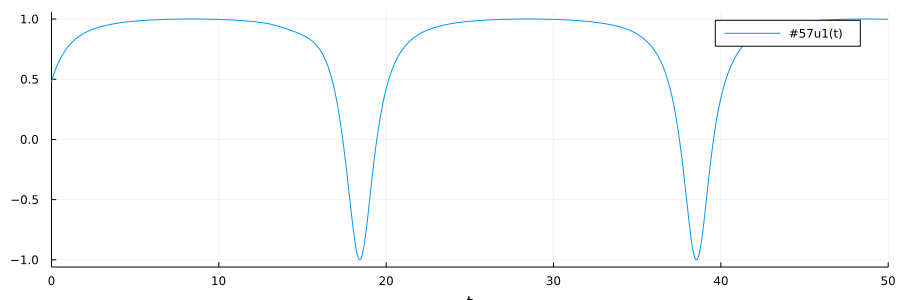

In [90]:
sol=solve(ODEProblem(adler, 0.5, (0,50.0), [1.0,0.95]))
plot(sol,vars=((t,x)->(t,sin(x)),0,1),size = (900,300))

## Analisis armónico

Lo que puede verse es que a medida que $a$ se aproxima a $\omega$ disminuye la frecuencia de oscilacion pasa de ser una oscilacion armonica simple a una cada vez mas "picuda" y con un espectro mas complejo. 
Para ver el espectro tenemos que definir una frecuencia de sampleo fs y precalcular la solucion 

In [95]:
@manipulate throttle=.1 for a=0:0.01:1.0,tmax=1.0:5:300
    sol=solve(ODEProblem(adler, 0.5, (0,tmax), [1.0,a]),Rosenbrock23())
    fs = 100
    ts = 0:1/fs:300.0
    p1 = plot(sol,vars=((t,x)->(t,sin(x)),0,1))
    p2 = plot(rfftfreq(length(ts), fs),abs.(rfft(sin.(sol(ts,idxs=1)))),xlims=(0,1))
    plot(p1,p2,layout=(1,2),size = (900,300))
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["a"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000f3eb850, Task (runnable) @0x000000000f3eb850), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23\

## Bifurcacion Nodo Silla sobre el ciclo limite. SNLC

Que sucede cuando $a=\omega$?

Como el caso de flujos 1D en la linea vamos a representar la funcion $f(x)$ para estudiar los posibles puntos fijos.



In [108]:
@manipulate throttle=.2 for a=0:0.01:1.2,xini=0:0.01:2*pi
    ω = 1.0
    prob = ODEProblem(adler, xini, (0,100), [ω,a])
    sol = solve(prob,Rosenbrock23())
    x=0:0.02:2.0*pi
    p1 = plot(x,adler1.(x,([ω,a],),0.0),label="f(x)")
    plot!(p1,mod.(sol.u,2*pi),sol.u*0)
    scatter!(p1,mod.(sol.u,2*pi),sol.u*0,label="x")
    scatter!(p1,[prob.u0],[0],label="xini")
    p2 = plot(sol,vars=((t,x)->(t,mod.(x,2*pi)),0,1))
    plot(p1,p2,layout=(1,2),size = (900,300))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["a"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 121, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
61, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000f5de590, Task (runnable) @0x000000000f5de590), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23\

probando en la celda interactiva anterior se puede ver que:

1. para $a>\omega$ hay dos puntos fijos en el ciclo uno estable antes de $\pi/2$ y otro inestable luego de $\pi/2$
2. para $a=\omega$ los dos puntos fijos colapsan en $\theta=\pi/2$ (bifurcacion de nodo silla)
3. para $a<\omega$ no hay puntos fijos y el angulo fase avanza continuamente, pero no de forma uniforme, se frena cuando pasa cerca de $\theta=\pi/2$ (o seno = 1), tanto mas cuanto mas cerca esta $a$ de $\omega$


Podemos ver que para $a=0$ el periodo converge a $T=2\pi/\omega$ y que a medida que 
$a$ se acerca a $\omega$ el periodo se hace mas y mas largo. Finalmente diverge y el 
periodo se hace infinito en la bifurcacion de nodo-silla.

Esta divergencia del periodo se debe al 'critical slowing down' (ralentizado) que anuncia la proximidad de una bifurcacion de nodo-silla y aparece siempre cerca de este tipo de bifurcacion.

De forma mas general (y en 2D y 3D) vamos a ver que esta bifuracion se puede dar sobre un ciclo limite y se llama SNLC (Saddle Node on Limit Cycle) o nodo silla sobre ciclo limite y se caracteriza porque da origen a oscilaciones que se crean con periodo arbitrariamente grande. Esto va a distinguir a estas oscilaciones de otro tipo de bifurcacion de da origen a oscilaciones con periodo definido (bifurcacion de Hopf)

## DIAGRAMA DE BIFURCACIONES

Bifurcacion de Nodo Silla (SN Saddle-Node) 

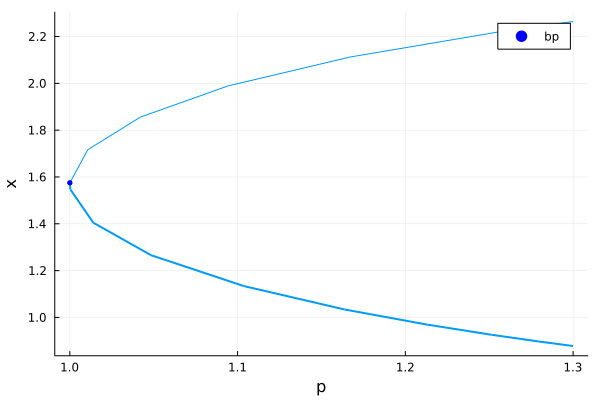

In [132]:
using BifurcationKit, Setfield

F=(x,p) -> @. adler(x,(p,),0)
opts = ContinuationPar(pMin=0.9,pMax=1.3, ds=-0.02, detectBifurcation=3)
br, = continuation(F,[1.0],[1.0,1.3],(@lens _[2]), opts)
plot(br)

# Excitacion periodica

Cuando excitamos un oscilador lineal de frecuencia propia $\omega$ con un forzado periodico externo de frecuencia $\Omega$ solo podemos tener una respuesta posible, el oscilador se sincroniza a la frecuencia externa con una amplitud que depende de la diferencia de las frecuencias, lo que se conoce como resonancia.

Dicho de otro modo la unica libertad que tiene un oscilador lineal para responder a un forzado es mediante la amplitud, pero no puede hacer nada mas.

Cuando excitamos a un oscilador no lineal como el que da la ecuacion de Adler con un forzado periodico externo de frecuencia $\Omega$ con amplitu $p$ tenemos un repertorio muchisimo mas variado de respuestas posibles.

$\dot{\theta} = \omega-a\sin(\theta)+p\sin(\Omega)$


In [133]:
#definimos la ed
adler_forced(u,p,t) = p[1]-p[2]*sin(u)+p[3]*sin(p[4]*t)

adler_forced (generic function with 1 method)

In [135]:
@manipulate throttle=.1 for a=0:0.01:2.0,b=0:0.01:1.0,Ω=0:0.01:2.0,tmax=1.0:5:300
    ω = 1.0
    sol=solve(ODEProblem(adler_forced, 0.5, (0,tmax), [ω,a,b,Ω]),Rosenbrock23())
    plot(sol,vars=((t,x)->(t,sin(x)),0,1),size = (900,300))
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["a"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 201, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
101, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000f8c12d0, Task (runnable) @0x000000000f8c12d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23

# Dos osciladores acoplados

Otro ejemplo interesante es el de dos osciladores no lineales acoplados.
El termino de acople se expresa como el seno de la diferencia de fases. Esto fuerza la sincronizacion entre ambos osciladores


$\dot{\theta_1} = \omega_1-\sin(\theta_1) + k\sin(\theta_2-\theta_1)$

$\dot{\theta_2} = \omega_2-\sin(\theta_2) + k\sin(\theta_1-\theta_2)$

In [139]:
function adler_coupled!(du,u,p,t)
    (ω1,ω2,k) = p
    du[1] = ω1-sin(u[1])+k*sin(u[2]-u[1])
    du[2] = ω2-sin(u[2])+k*sin(u[1]-u[2])
    return
end

adler_coupled! (generic function with 1 method)

In [151]:
@manipulate throttle=.1 for ω1=0:0.01:2.0,ω2=0:0.01:2.0,k=0:0.01:2.0,tmax=1.0:5:300
    sol=solve(ODEProblem(adler_coupled!, [0.5,0.5], (0,tmax), [ω1,ω2,k]),Rosenbrock23())
    p1 = plot(sol,vars=((t,x)->(t,sin(x)),0,1))
    plot!(p1,sol,vars=((t,x)->(t,sin(x)),0,2))
    p2 = plot(sol,vars=((x,y)->(sin(x),sin(y)),1,2),xlims=(-1,1),ylims=(-1,1))
    plot(p1,p2,layout=(1,2),size = (900,300))
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["ω1"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 201, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
101, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000fa5d460, Task (runnable) @0x000000000fa5d460), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.2